In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/kaggle/input/btc-all/15m.csv')
data['ds'] = pd.to_datetime(data['ds'])
data = data[700:]

pd.isna(data).values.any()

In [35]:
del data['open']

for i in ['count', 'feeValue', 'inputCount', 'inputValue', 'minedValue', 'outputCount','outputValue','fee_avg', 'btc_dom', 'open_interest', 'volume', 'SPX', 'NDX', 'DXY', 'DJI', 'VIX', 'GOLD']:
    data[i] = np.log2(data[i])

data = data.rename(columns={'SMA50':'y'})
data

,ds,high,low,close,volume,count,feeValue,inputCount,inputValue,minedValue,...,long_short_ratio,funding_rate,sentiment_mean,sentiment_sum,SPX,DXY,DJI,VIX,NDX,GOLD
700,2021-12-08 07:00:00,50637.62,50490.37,50508.28,9.895292,11.216140,-3.640270,12.709299,14.638446,4.234976,...,1.743652,0.000100,0.1164,44.0091,12.194320,6.589584,15.124400,4.472488,13.994707,10.804103
701,2021-12-08 07:15:00,50545.10,50430.50,50518.69,10.033309,12.479022,-2.514135,13.735873,16.398397,3.663920,...,1.726976,0.000100,0.1164,44.0091,12.194320,6.589584,15.124400,4.472488,13.994707,10.803836
702,2021-12-08 07:30:00,50570.00,50436.03,50509.99,9.416846,11.443462,-3.698337,12.958553,14.703329,3.652720,...,1.730265,0.000100,0.1164,44.0091,12.194320,6.589584,15.124400,4.472488,13.994707,10.805748
703,2021-12-08 07:45:00,50562.65,50397.92,50489.99,9.857574,12.046101,-2.818697,14.394195,16.851313,4.652013,...,1.741307,0.000100,0.1164,44.0091,12.194320,6.589584,15.124400,4.472488,13.994707,10.806654
704,2021-12-08 08:00:00,50628.00,50443.10,50565.43,10.316258,10.526499,-4.530837,11.824163,14.997221,2.653807,...,1.743765,0.000100,0.1164,44.0091,12.194320,6.589584,15.124400,4.472488,13.994707,10.804946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93480,2024-07-31 18:00:00,66710.30,66259.20,66382.60,12.832510,13.226713,-2.308338,14.729833,14.057240,3.259558,...,1.790200,0.000038,-0.0077,-1.7933,12.430314,6.704429,15.323702,4.005400,14.235000,11.207185
93481,2024-07-31 18:15:00,66419.30,66107.40,66165.10,11.803123,13.349972,-2.021521,15.121655,13.550717,3.672007,...,1.801900,0.000038,-0.0077,-1.7933,12.432719,6.704360,15.325422,3.996389,14.238180,11.207185
93482,2024-07-31 18:30:00,66594.00,66125.60,66519.60,12.232243,13.755722,-2.767945,14.515330,11.574014,3.251236,...,1.824900,0.000038,-0.0077,-1.7933,12.434313,6.703045,15.326793,3.992768,14.240768,11.207185
93483,2024-07-31 18:45:00,66577.10,66346.80,66498.50,11.106407,13.755722,-2.767945,14.515330,11.574014,3.251236,...,1.828900,0.000038,-0.0077,-1.7933,12.438072,6.701563,15.329462,3.985500,14.245022,11.207185


In [36]:
histr_columns = ['high', 'low', 'volume', 'count', 'feeValue', 'inputCount', 'minedValue', 'outputCount','fee_avg', 'RSI', 'STOCHK', 'ATR', 'MACD12', 'MACD24','CCI', 'ADX', 'DPO', 'MI', 'WILLR',
                 'eth_btc','btc_dom', 'open_interest', 'long_short_ratio', 'EMA200', 'SMA200', 'WMA200', 'EMA50', 'WMA50', 'VWAP', 'MMA']
data=data[['ds', 'y']+histr_columns]

In [37]:
df=data[:-500]
df

,ds,y,high,low,volume,count,feeValue,inputCount,minedValue,outputCount,...,btc_dom,open_interest,long_short_ratio,EMA200,SMA200,WMA200,EMA50,WMA50,VWAP,MMA
700,2021-12-08 07:00:00,50528.300,50637.62,50490.37,9.895292,11.216140,-3.640270,12.709299,4.234976,12.696098,...,9.971831,15.263899,1.743652,50352.406,50057.910,50556.555,50565.030,50473.344,50377.650,50583.690
701,2021-12-08 07:15:00,50520.152,50545.10,50430.50,10.033309,12.479022,-2.514135,13.735873,3.663920,13.984863,...,9.968667,15.265185,1.726976,50354.062,50065.945,50561.140,50563.215,50472.965,50407.758,50581.527
702,2021-12-08 07:30:00,50511.168,50570.00,50436.03,9.416846,11.443462,-3.698337,12.958553,3.652720,12.820977,...,9.969530,15.263952,1.730265,50355.613,50074.390,50565.560,50561.125,50472.566,50425.170,50579.140
703,2021-12-08 07:45:00,50499.830,50562.65,50397.92,9.857574,12.046101,-2.818697,14.394195,4.652013,13.470532,...,9.967370,15.263899,1.741307,50356.950,50083.508,50569.695,50558.336,50471.740,50445.535,50576.168
704,2021-12-08 08:00:00,50492.258,50628.00,50443.10,10.316258,10.526499,-4.530837,11.824163,2.653807,11.979782,...,9.963908,15.267998,1.743765,50359.027,50093.414,50574.490,50558.613,50474.310,50473.582,50575.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92980,2024-07-26 13:00:00,67006.300,67331.40,67139.00,10.615277,11.818183,-3.550578,12.838810,1.682728,13.233919,...,11.338179,16.414935,1.018200,66002.360,65602.940,65815.500,66846.180,67123.800,67248.430,66730.950
92981,2024-07-26 13:15:00,67026.914,67398.00,67161.30,10.979878,12.746724,-1.993180,15.200324,3.672559,14.571812,...,11.338681,16.418023,1.008800,66016.160,65607.664,65833.270,66867.480,67138.810,67243.120,66752.900
92982,2024-07-26 13:30:00,67050.280,67756.90,67264.20,13.469518,11.423641,-3.838131,13.109667,1.675780,12.940864,...,11.339683,16.420106,1.008400,66031.580,65613.760,65852.760,66894.850,67159.940,67343.120,66779.984
92983,2024-07-26 13:45:00,67081.750,67954.90,67507.60,12.946377,12.265029,-2.731937,14.084310,2.678190,13.927130,...,11.343130,16.415895,1.041600,66049.800,65621.340,65875.130,66932.805,67191.800,67435.390,66816.080


In [ ]:
forecast_horizon = 16

m = NeuralProphet(
    n_lags=7 * forecast_horizon,
    n_forecasts=forecast_horizon,
    n_changepoints=25,
    changepoints_range=0.9,
    trend_reg=0.1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    ar_layers=[128, 128, 128, 128],
    lagged_reg_layers=[96, 96, 96],
    ar_reg=1,
    learning_rate=0.002,
    epochs=300,
    accelerator='cuda',
    normalize='standardize'
)

for column in histr_columns:
    m.add_lagged_regressor(column, n_lags=9 * forecast_horizon)

metrics_train = m.fit(df=df, validation_df=data[-600:])

In [39]:
metrics_train

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,787.873291,991.207581,0.006774,0.000000,0,0.025870,0.000000,1253.719604,1754.724976,0.025862,0.000000
1,470.470215,599.090271,0.002474,0.000000,1,0.001473,0.000000,396.325317,521.444214,0.001473,0.000000
2,384.334198,496.160461,0.001697,0.000000,2,0.000875,0.000000,306.015320,403.279816,0.000874,0.000000
3,357.250427,451.826141,0.001407,0.000000,3,0.000585,0.000000,251.565170,330.936676,0.000585,0.000000
4,296.639313,379.847870,0.000995,0.000000,4,0.000436,0.000000,217.894989,285.605591,0.000436,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
295,76.907547,106.893913,0.000696,0.000617,295,0.000646,0.000618,41.388371,71.720306,0.000646,0.000618
296,79.197403,116.114502,0.000709,0.000616,296,0.000645,0.000616,42.712051,72.628967,0.000645,0.000616
297,68.698448,103.040787,0.000687,0.000614,297,0.000643,0.000615,41.822834,71.972176,0.000643,0.000615
298,65.257568,101.416489,0.000684,0.000613,298,0.000643,0.000614,42.508011,72.379364,0.000642,0.000614


In [40]:
def viz(idx):
    input_df = m.make_future_dataframe(data[:idx], periods=forecast_horizon)  # periods=m.n_forecasts, n_historic_predictions=False
    true_df = data[idx:idx+forecast_horizon]
    predicted_df = m.predict(input_df, raw=True, decompose=False)

    time_delta = pd.Timedelta(minutes=15)
    predicted_dates = [predicted_df['ds'][0] + i * time_delta for i in range(forecast_horizon)]
    predicted_values = [predicted_df[f'step{i}'][0] for i in range(forecast_horizon)]

    plt.figure(figsize=(20, 7))

    plt.plot(input_df['ds'], input_df['y'], label='Вхідні дані', color='green')
    plt.plot(true_df['ds'], true_df['y'], label='Справжні дані', color='blue')
    plt.plot(predicted_dates, predicted_values, label='Передбачені дані', color='red', linestyle='--')

    plt.xlabel('Дата')
    plt.ylabel('Ціна')
    plt.title('Вхідні, справжні та передбачені дані')
    plt.legend()
    plt.grid(True)
    plt.show()

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


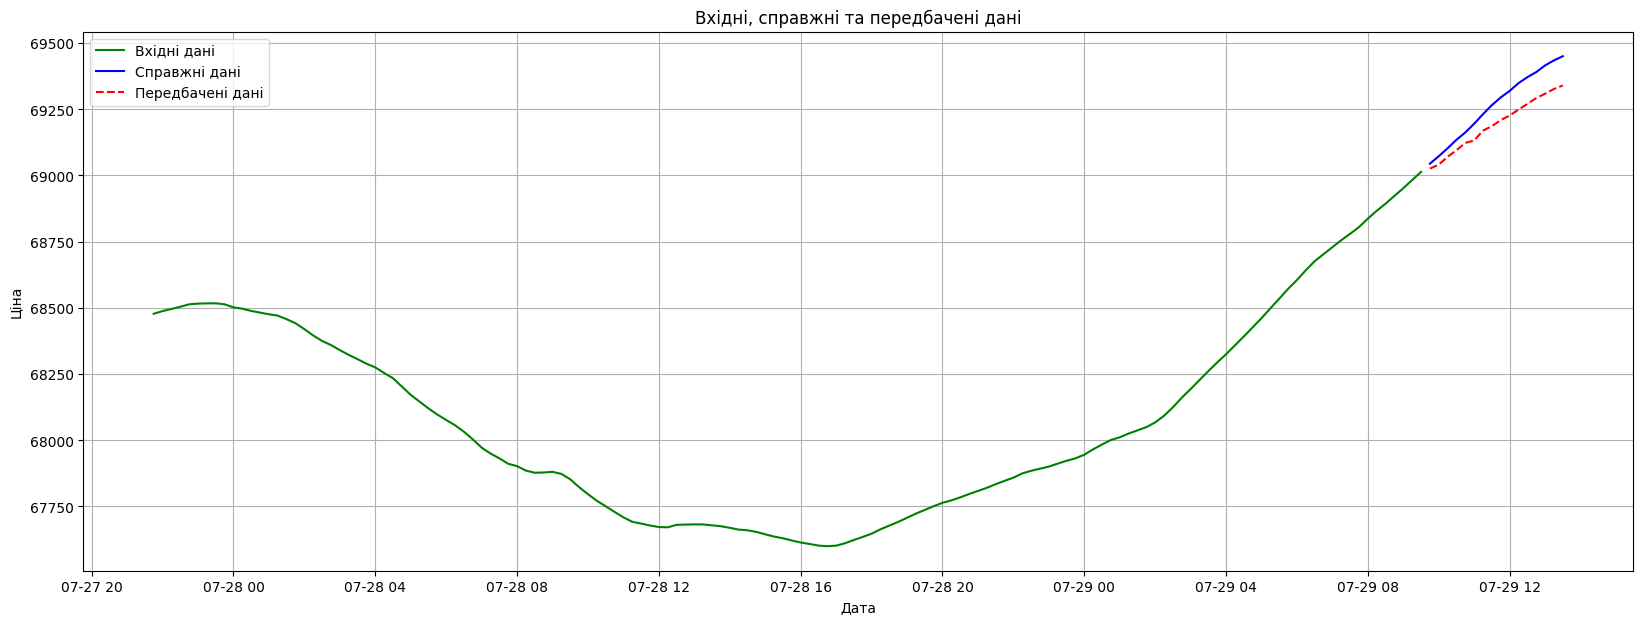

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


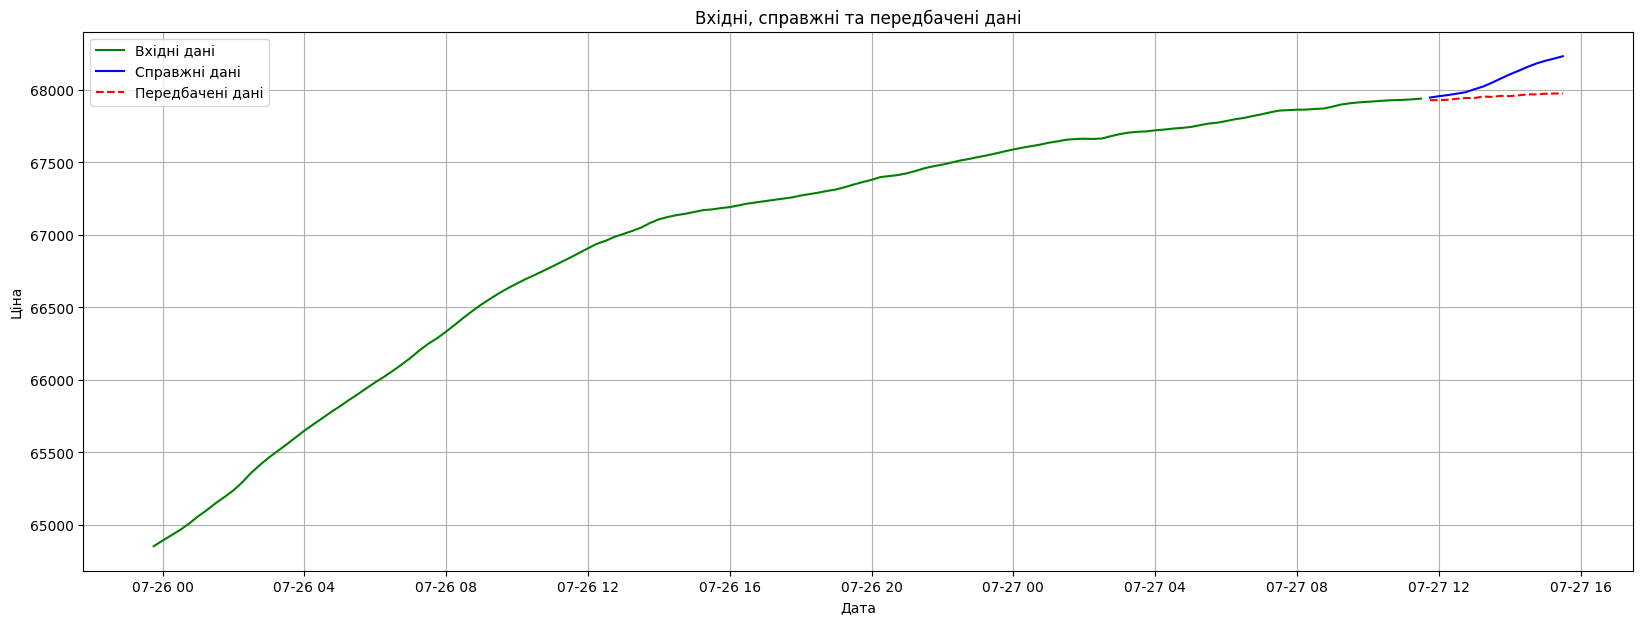

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


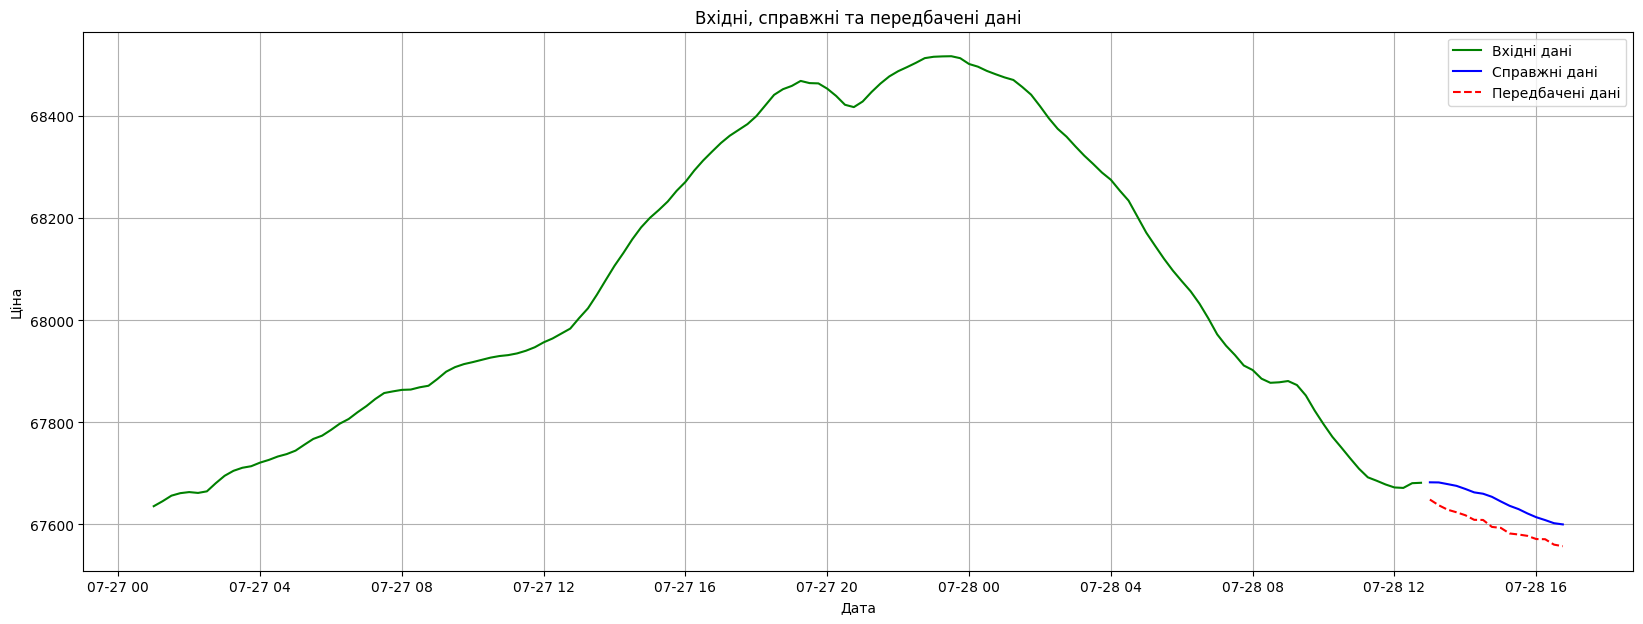

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


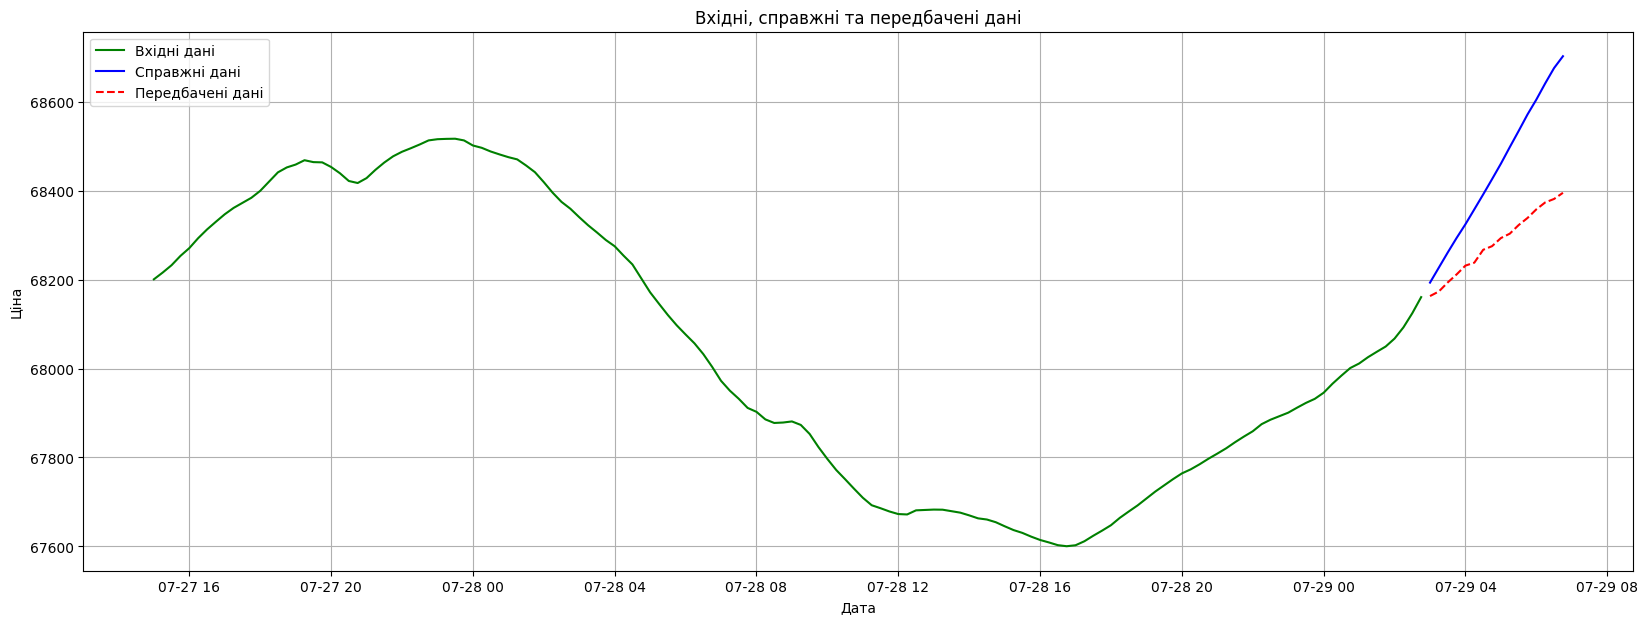

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


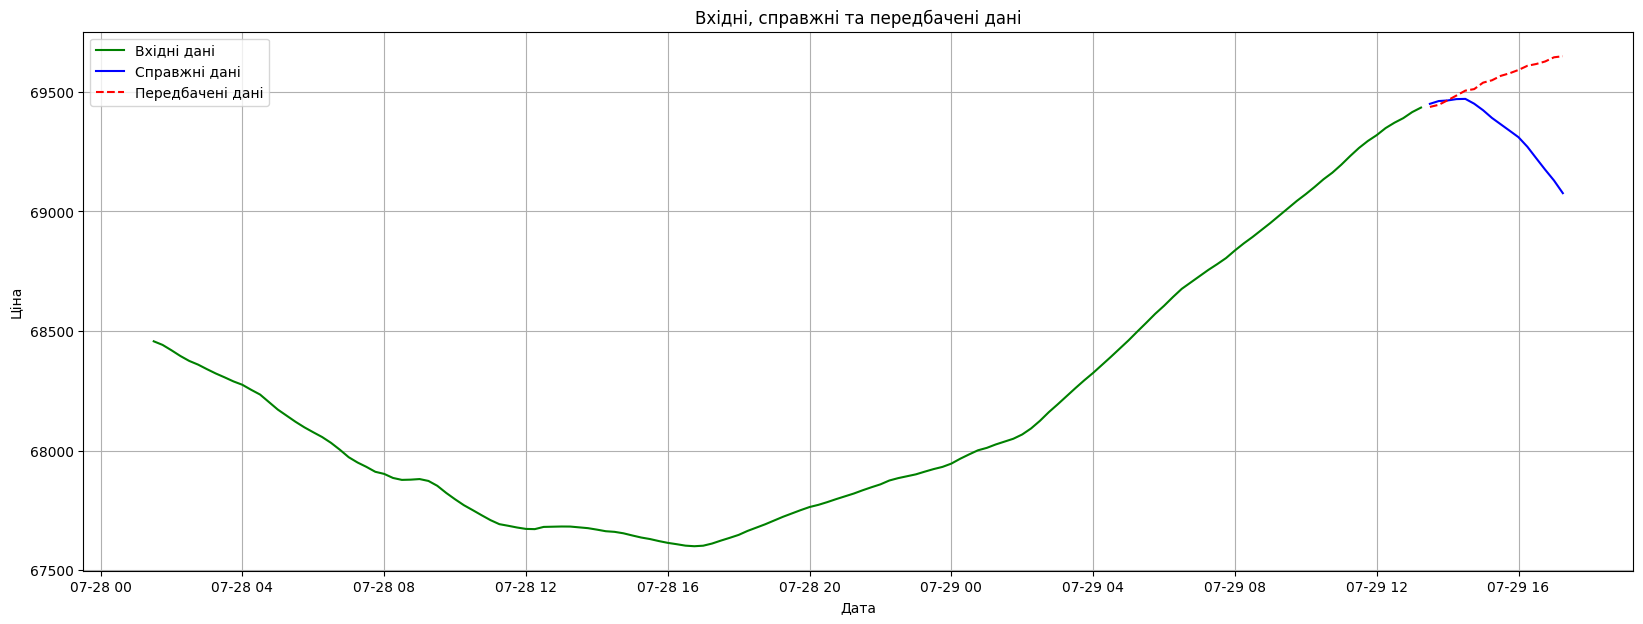

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


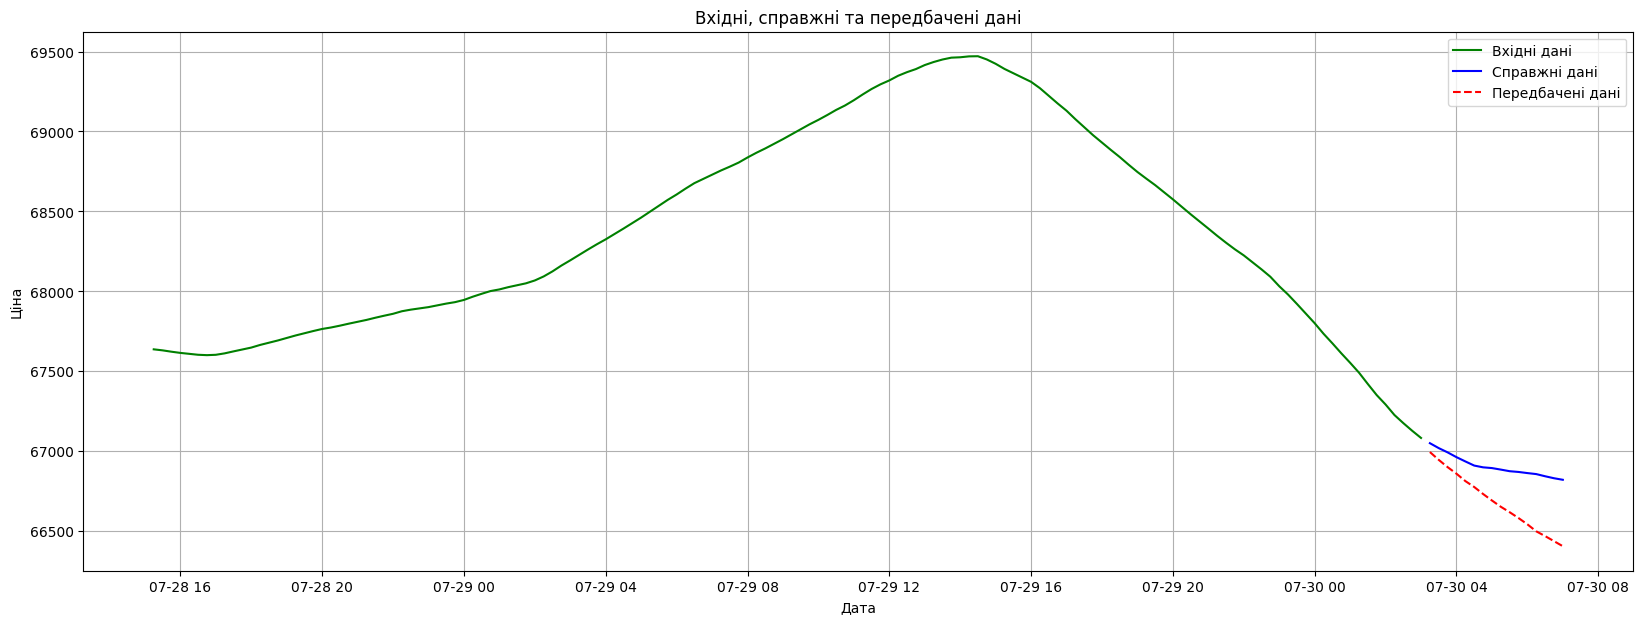

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


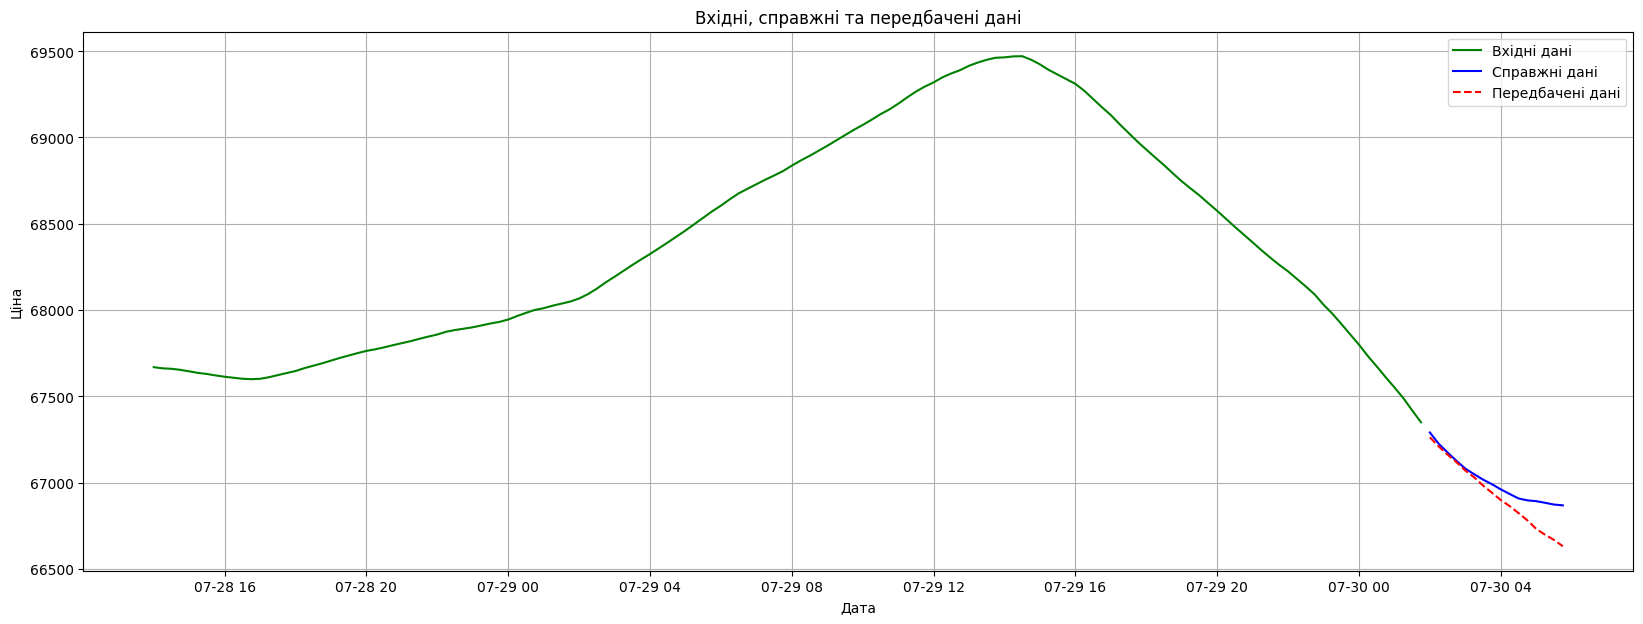

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


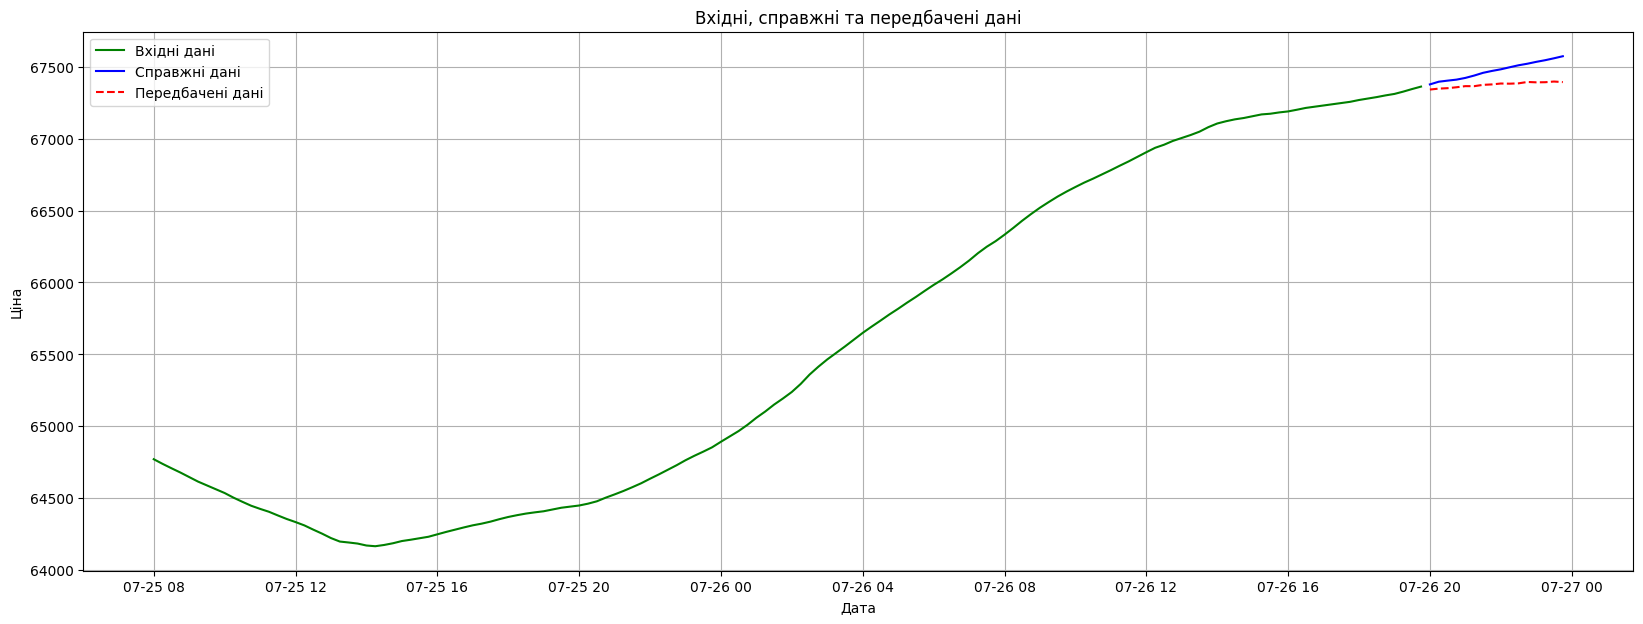

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


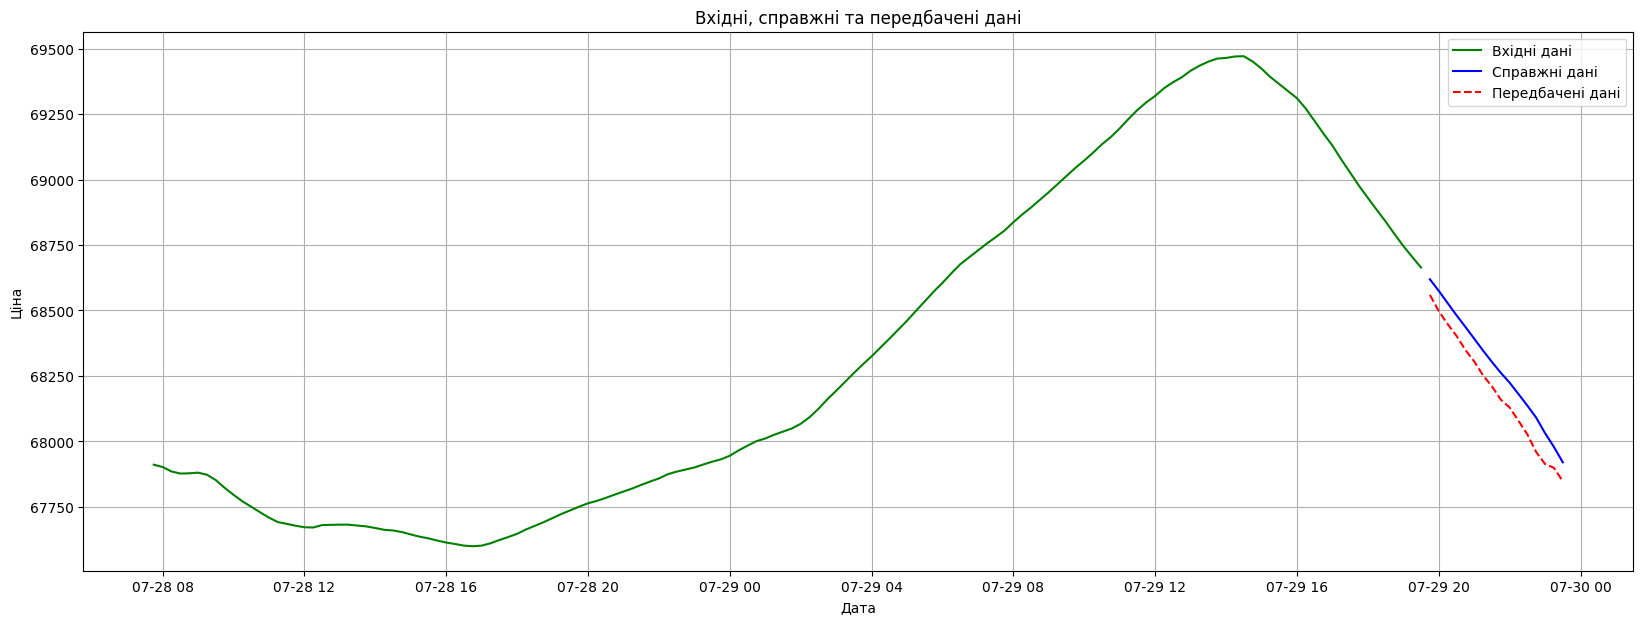

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


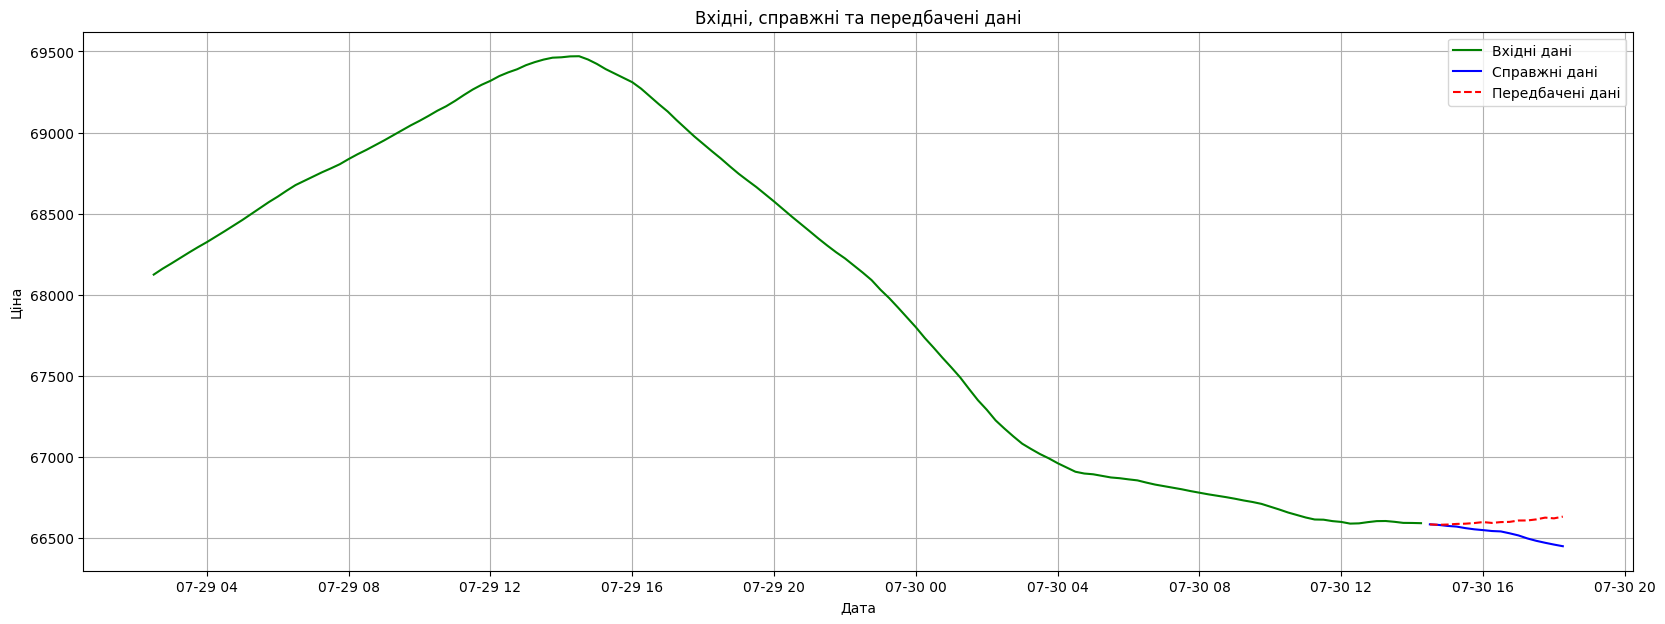

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


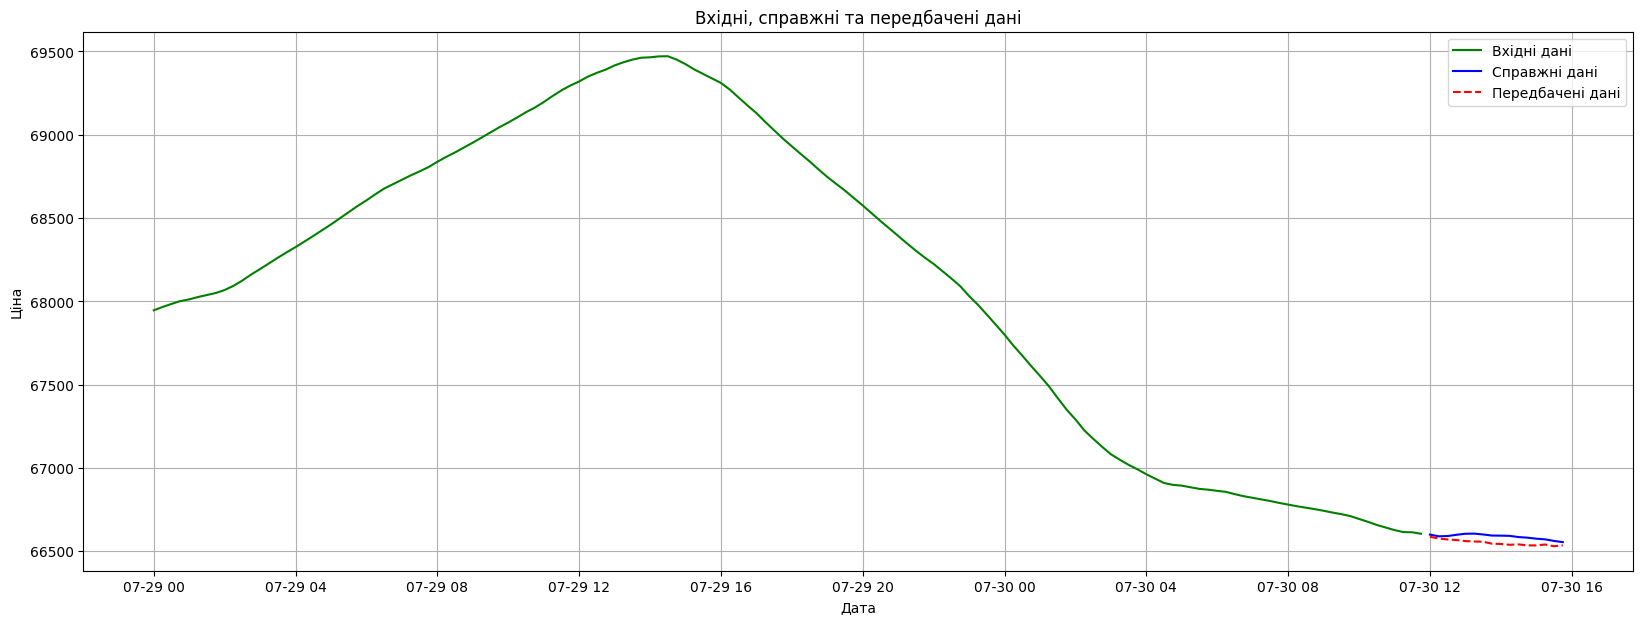

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


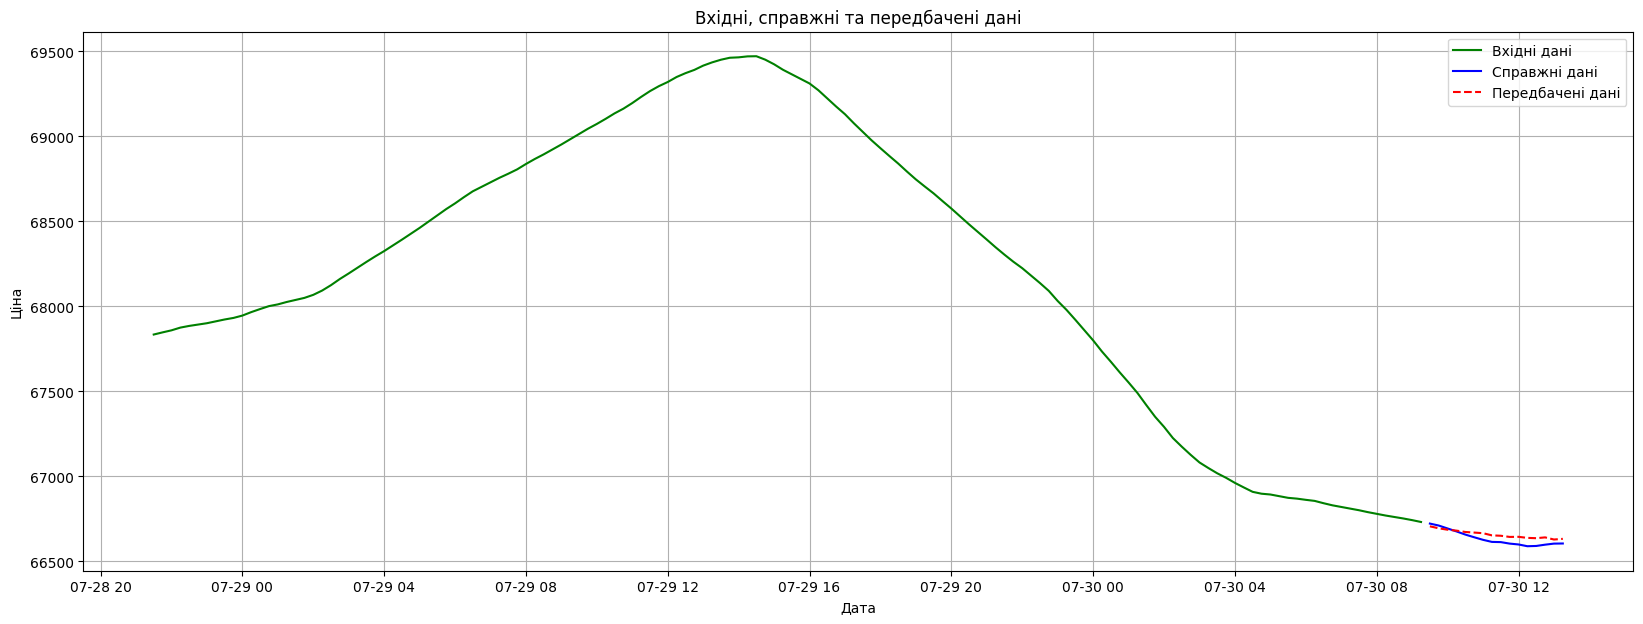

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


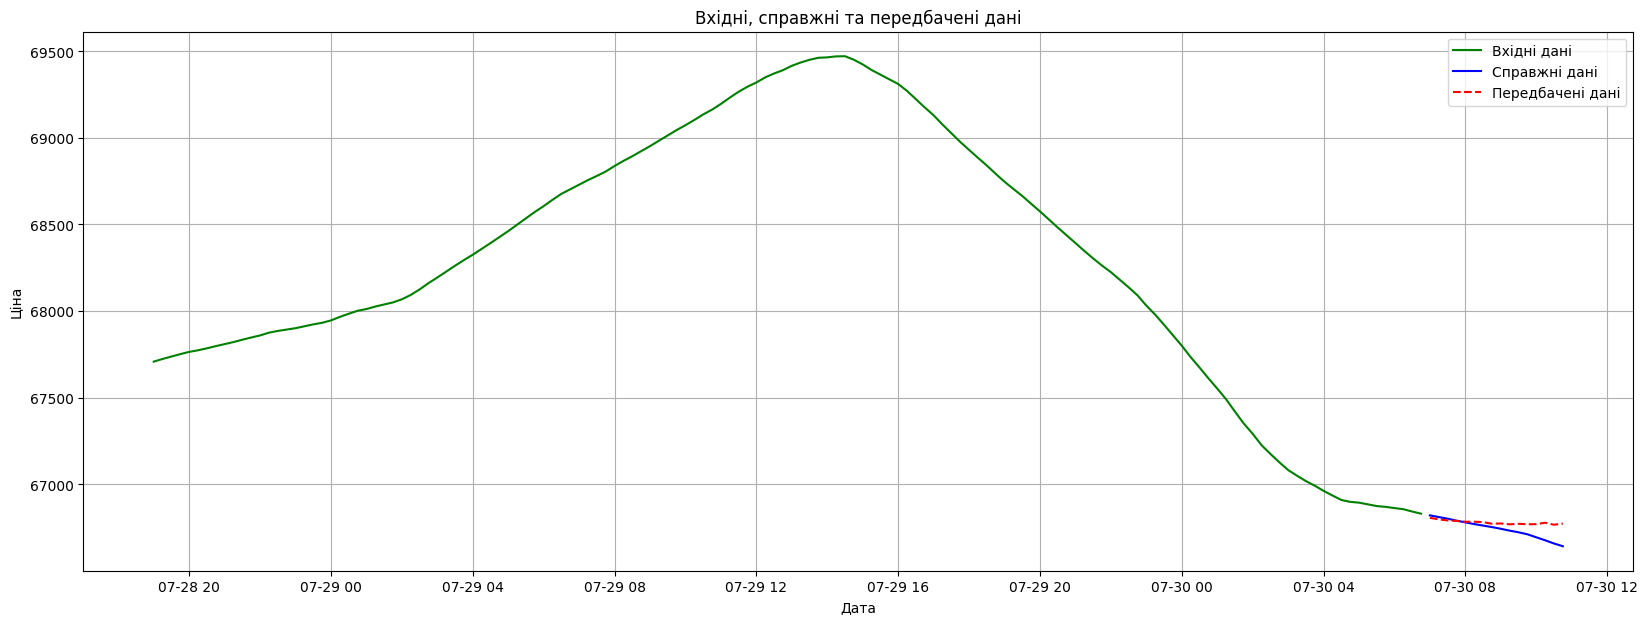

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


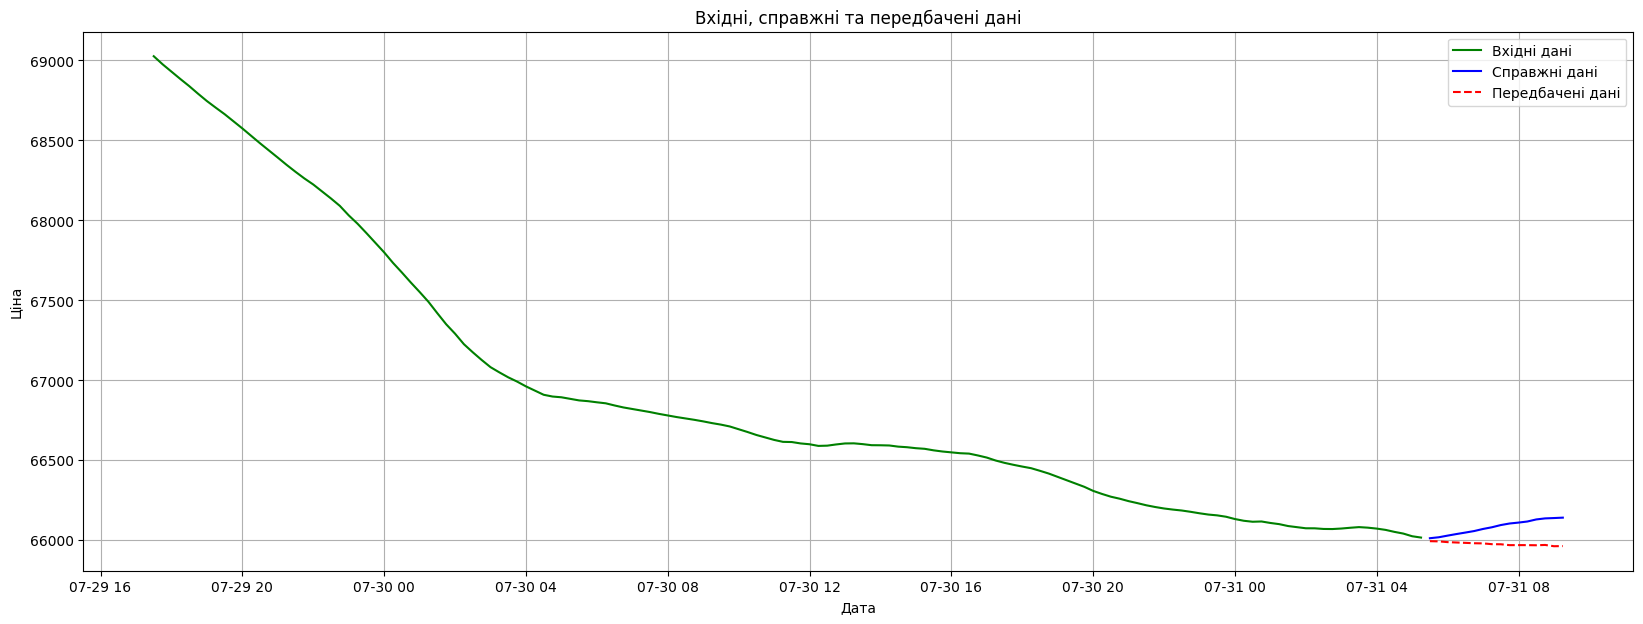

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


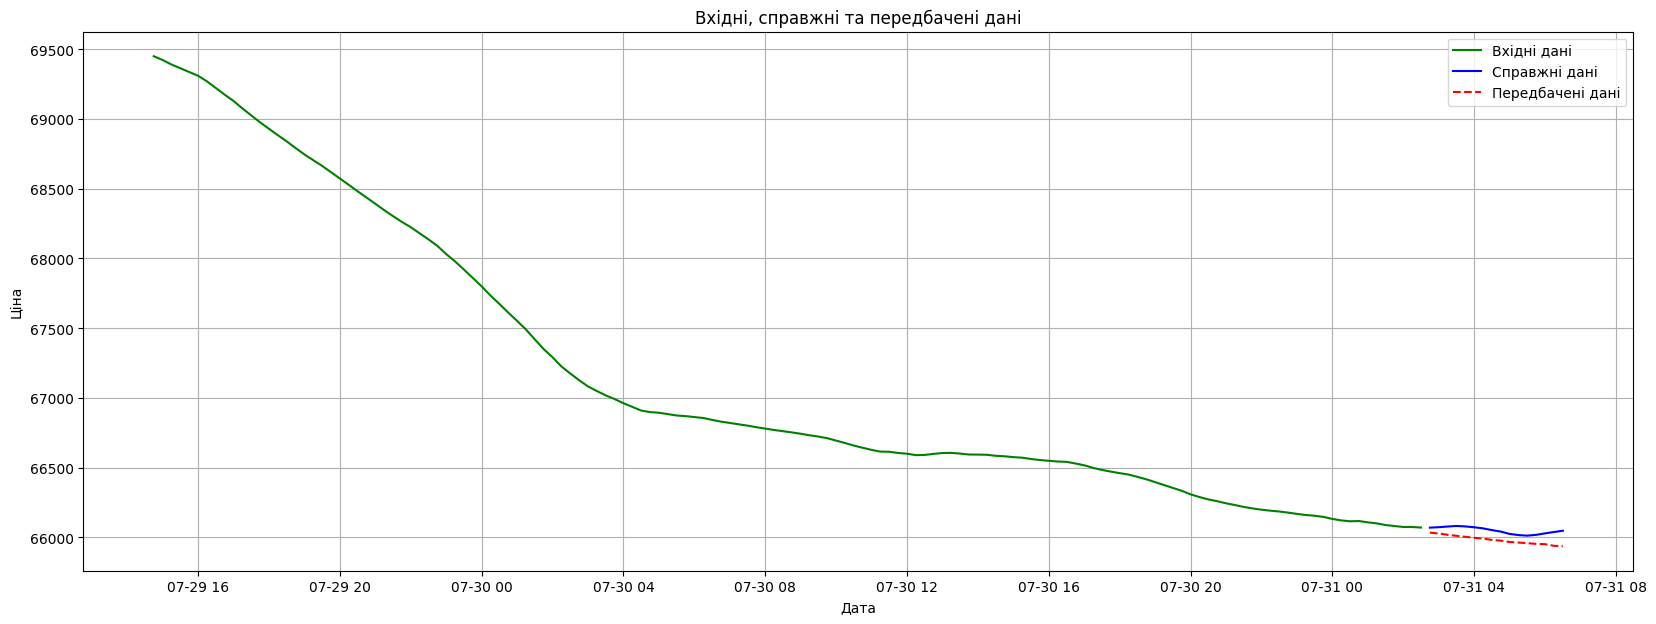

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 15min corresponds to 99.999% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


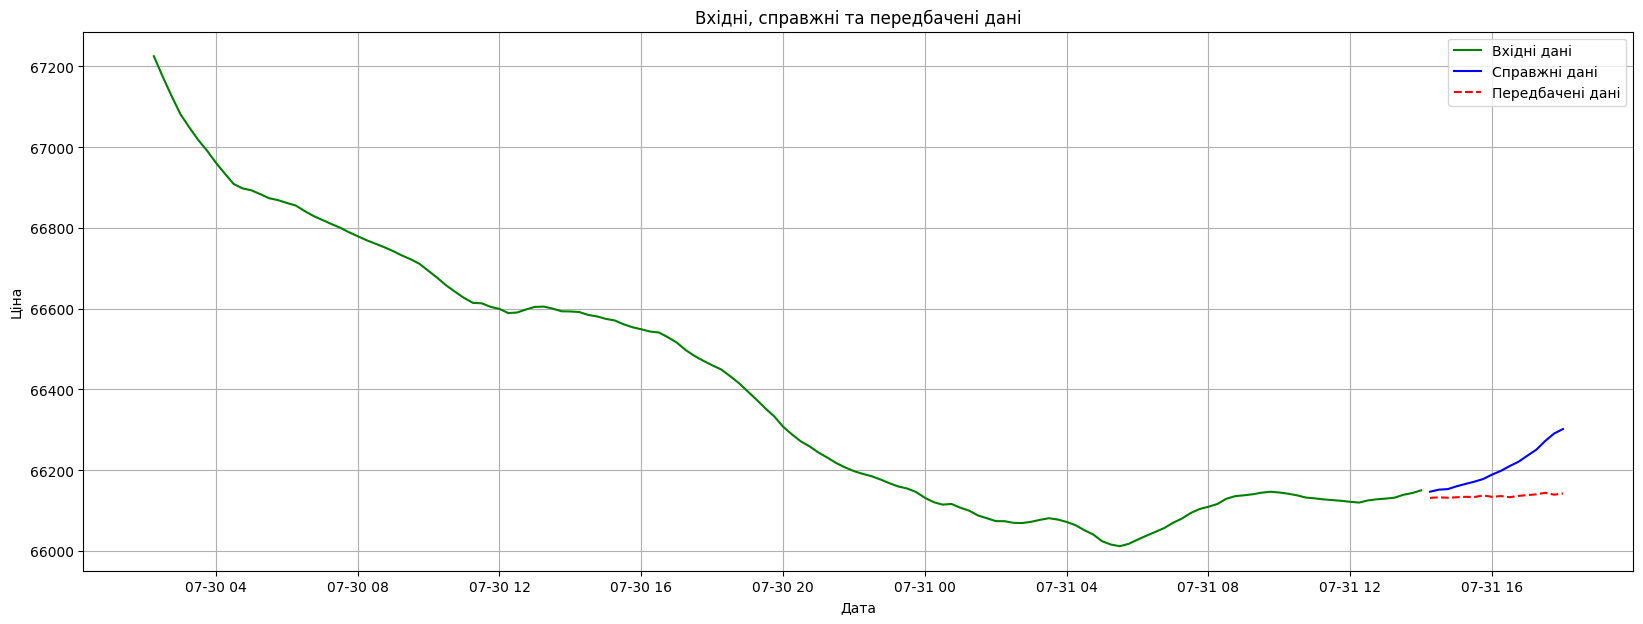

In [41]:
viz(-230)
viz(-414)
viz(-313)
viz(-257)
viz(-215)
viz(-160)
viz(-165)
viz(-477)
viz(-190)
viz(-115)
viz(-125)
viz(-135)
viz(-145)
viz(-55)
viz(-66)
viz(-20)

In [ ]:
from neuralprophet import save
save(m, "SMA50-BTCUSDT-15m.np")